# Composition d'informatique n°2

## Problème 1 :  Sommes sur un chemin dans une matrice

In [8]:
## Importations 
import random

## Matrices pour les vérifications de programme
M1=[[5,1,2],[3,4,5]]
M2=[[random.randint(1,10**3)*random.random() for j in range(20)] for i in range (10)]

# Exemples de chemins dans M1
chem1=[(1,1),(1,2),(1,3),(2,3)]

### 1.1 Préliminaires

> **Question 1**
Pour une matrice $m\times n$ on peut faire $n-1$ déplacements horizontaux et $m-1$ déplacements verticaux auquel il faut rajouter le premier élément de la liste.

In [9]:
def taille_chemins(mat:list[list[float]])->int:
    return len(mat) + len(mat[0]) - 1

taille_chemins(M1),taille_chemins(M2)

(4, 29)

> **Question 2**

On doit vérifier la correction des premier et dernier élément, ainsi que la validité de la formule de récurrence.
Si l'on arrive en fin de boucle c'est bien que la propriété est la bonne.

In [10]:
def chemin_coherent(chem:list[(int,int)],mat:list[list[float]])->bool:
    if chem[0] != (1, 1) or chem[-1] != (len(mat),len(mat[0])) :
        return False
    for i in range(1, len(chem)):
        if chem[i] not in [(chem[i-1][0]+1, chem[i-1][1]), (chem[i-1][0], chem[i-1][1]+1)]:
            return False
    return True

chemin_coherent(chem1,M1),chemin_coherent(chem1,M2)

(True, False)

> **Question 3**   
Aller à droite revient à incrémenter j, d'où l'affectation du booléen à la ligne 5.

In [13]:
def chemin_itineraire(chem:list[(int,int)])->list[bool]:
    res = []
    y = 1
    for i in range(1, len(chem)):
        res.append(chem[i][1] ==  chem[i-1][1]+1)
    return res

chemin_itineraire(chem1)

[True, True, False]

> **Question 4**    
On utilise ici le transtypage natif en python : `pos[ori]` est interprété comme `pos[0]` si `ori=True`, ce qui revient à incrémenter le numéro de ligne, et symétriquement pour le numéro de colonne.

In [18]:
def itineraire_chemin(itin:list[bool])->list[(int,int)]:
    res = [(1, 1)]
    pos = [1, 1]
    for ori in itin:
        pos[ori] += 1
        res.append((pos[0], pos[1]))
    return res

itineraire_chemin(chemin_itineraire(chem1))==chem1

True

> **Question 5**   

On choisit de faire appel à la fonction `chemin_coherent` précédemment écrite

In [19]:
def valide_itineraire(mat:list[list[float]],itin:list[bool])->bool:
    chem=itineraire_chemin(itin)
    return chemin_coherent(chem,mat)

valide_itineraire(M1,chemin_itineraire(chem1))

True

> **Question 6**

Comme son nom l'indique, ce programme calcule la valeur maximale d'un chemin dans la matrice par force brute, c'est à dire en testant tous les chemins.
Le programme récursifs montre le principe : la somme est initialisée à la valeur de la case en haut à gauche(l10). 
Les appels récursifs correspondent aux situations suivantes : 
* l.6 : arrivé à la dernière ligne, on ne peut progresser que selon une colonne
* l.8 : arrivé à la dernière colonne, on ne peut progresser que selon une ligne
* l.9. : on choisit d'avancer ou de descendre suivant ce qui permet de maximiser la somme de la partie aval de la matrice


> **Question 7**

Tous les chemins sont testés, et l'on peut se poser $m −1$ fois la question de descendre parmi $n+m-2$ étapes.
La complexité est donc en $\binom{n+m-2}{n-1}=\binom{n+m+-2}{m-1}$, soit une **complexité exponentielle** en les dimensions de la matrice.

C'est beaucoup trop et en pratique l'utilisation d'une récursion risque fort de déclencher un dépassement de pile pour des matrices que l'on pourrait rencontrer comme arguments.

*La complexité en espace est également élevée (toujours en rapport avec la pile d'appels), donc à ce stade pour éviter que Python cause un problème on peut simuler la pile soi-même en ajoutant quelques lignes,
ce qui permet de se passer de la récursion.*

> **Question 8**

Pour suivre les indications de l'énoncé, on doit conserver l'appel récursif mais sans chercher à trouver lequel des deux chemins est maximal.
Cela se traduit par la modification des lignes 7 (on suit le max des deux valeurs)  et 9 (pas d'hésitation dans l'appel récursif).

In [20]:
def somme_maximale_glouton1(mat:list[list[ float ]])->float :
    def somme (i:int , j:int)->float :
        if i == len(mat)-1 and j == len(mat [0])-1:
            return mat[i][j]
        if i == len(mat)-1:
            return mat[i][j] + somme (i, j+1)
        # ligne modifiée
        if j == len(mat[0])-1 or mat[i+1][j] >= mat[i][j+1]:
            return mat[i][j] + somme(i+1, j)
        # ligne modifiée
        return mat[i][j] + somme(i, j+1)
    return somme (0, 0)

somme_maximale_glouton1(M2)

9366.001473115233

> **Question 9**

Cette fois-ci un seul chemin est considéré, donc la complexité passe en
$\mathcal{O}(m+n)$, toujours avec les mêmes notations.


> **Question 10**

Soit la matrice suivante : 
$$
M=\begin{pmatrix}
1 & 2 \\ 
1 & 0 \\
\ldots & \ldots \\
1 & 0
\end{pmatrix}
$$
L'algorithme glouton fera d'abord aller à droite, puis il faudra forcément descendre jusqu'à la dernière, pour une somme de 3, alors que
descendre constamment donne une somme de *n*.

> **Question 11**   

On choisit de procéder en deux temps. On commence par écrire un programme `max_mat` qui détermine la position de la valeur maximale d'une matrice.
Il faut veiller à exclure le cas des coins supérieurs et inférieurs

In [21]:
def max_mat(mat:list[list[ float ]])->(int,int):
    imax,jmax = 0, 1 
    m,n=len(mat),len(mat[0])
    for i in range(m):
        for j in range(n):
            if (i,j) != (0,0) and (i,j) != (m,n) and mat[i][j] > mat[imax][jmax]:
                imax,jmax=i,j
    return imax,jmax

max_mat(M1),max_mat(M2)

((1, 2), (2, 14))

On définit ensuite deux sous-matrices qui ont pour coin inférieur droit et supérieur gauche la valeur maximale précédemment déterminée auxquelles on applique selon les indications de l'énoncé les programmes demandés.

In [22]:
def somme_maximale_glouton2(mat)->int:
    imax, jmax = max_mat(mat)
    m,n=len(mat),len(mat[0])
    mat1 = [[mat[i][j] for j in range(jmax+1)] for i in range(imax+1)]
    mat2 = [[mat[i][j] for j in range(jmax, n)] for i in range(imax, m)]
    somme1 = somme_maximale_glouton1(mat1)
    somme2 = somme_maximale_glouton1(mat2)
    return somme1 + somme2 - mat[imax][jmax]

somme_maximale_glouton2(M2)


7458.72206544942

> **Question 12**

Le calcul du maximum de la matrice est en $\mathcal{O}(mn)$. Par la suite, on construit avec la même complexité les deux sous-matrices.    
*La consommation en mémoire n'était en pratique pas nécessaire, mais adapter la fonction `somme_maximale_glouton1` aurait nécessité plus de temps et d'énergie*.    
Les deux appels `somme_maximale_glouton1` sont de complexité $\mathcal{O}(m+n)$ d'après ce qui précède, donc on a une complexité totale en $\boxed{\mathcal{O}(mn)}$ 

> **Question 13**

Le contre-exemple précédent reste valable, car il n'y a qu'un chemin
possible une fois le maximum calculé et considéré comme un point de
passage nécessaire.

On pourrait par ailleurs trouver des cas où un des algorithmes gloutons
donne une réponse strictement meilleure que l'autre et vice-versa.

> **Question 14**   

Le principe de l'algorithme est de déterminer pour chaque case de la matrice quelle est la plus grande valeur d'un chemin qui terminerait dans cette case. Cette valeur s'obtient en additionnant l'entier stocké dans la case et la plus grande valeur d'un chemin qui terminerait dans la case du haut (si elle existe) ou de gauche (si elle existe), en prenant le maximum quand il y a deux possibilités.    
L'initialisation est donc 
$$
s_{0,0}=m_{0,0}
$$

L'initialisation des lignes et colonnes est similaire : 
$$
s_{i,0}
    = m_{i,0} + s_{i-1,0}
\quad \textrm{et} \quad
s_{0,j}
   = m_{0,j} + s_{0,j-1}
$$

Pour le cas général, on se ramène 
$$
s_{i,j}
    =m_{i,j} + max(s_{i-1,j},s_{i,j-1})
$$

> **Question 15**


In [23]:
def maxsomme(mat:list[list[float]])->float:
    nl = len(mat)
    nc = len(mat[0])
    maxsommes = [[None for _ in range(nc)] for _ in range(nl)]
    maxsommes[0][0] = mat[0][0]
    for i in range(1, nl):
        maxsommes[i][0] = maxsommes[i-1][0] + mat[i][0]
    for i in range(1, nc):
        maxsommes[0][i] = maxsommes[0][i-1] + mat[0][i]
    for i in range(1, nl):
        for j in range(1, nc):
            maxsommes[i][j] = mat[i][j] + max(maxsommes[i-1][j], maxsommes[i][j-1])
    return maxsommes[-1][-1]

maxsomme(M2)

11940.18679772722

> **Question 16**

Chaque case n'est considérée qu'une fois avec un traitement constant, la complexité est donc linéaire en le nombre total d'éléments de la matrice, soit $\mathcal{O}(m\times n))$.   
La complexité en espace est également de l'ordre de la taille de la matrice.

## Problème 2 :  Un peu de rugby

> **Question 17**

Commençons par remarquer que les transformations ne pouvant exister sans essai, les 3 possibilités d'incrément du score sont +3,+5 et +7 (sympatiquement tous premiers).    
On peut donc proposer une approche *force brute* : 
on écrit $n=7m+5p+3q$ et l'on teste tous les triplets $m,p,q$ possibles.

In [24]:
# Mini-base de vérification

joueurs={"France":["Lucu","Hastoy","Dupont","Ramos"],"Afrique du Sud":["du Toit","Vermelen"]}
cr1=[["Dupont","essai","2"],["Ramos","transformation","3"]]
cr2=[["Ramos","transformation","3"],["Dupont","essai","2"]]

In [25]:
def degenerescence_score(n:int)->int:
    res=0
    m,p,q=n//7+1,n//5+1,n//3+1
    for i in range(m):
        for j in range(p):
            for k in range(q):
                if 7*i+5*j+3*k==n:
                    res+=1
    return res

degenerescence_score(50)

16

Un peu plus élégamment, on peut réaliser deux boucles imbriquées où l'on retire au score les multiples de 7 et 5 successifs et l'on teste si le résultat est un multiple de 3.

In [15]:
def degenerescence_score(n:int)->int:
    res = 0 
    for n1 in range(n, -1, -7): 
        for n2 in range(n1, -1, -5): 
            if n2 % 3 == 0:
                res+=1 
    return res
    
degenerescence_score(50) 

16

> **Question 18**

In [27]:
def trouve_equipe(joueur:str)->str :
    for equipe in joueurs:  
        if joueur in joueurs[equipe]:  
            return equipe  
    return False

trouve_equipe("Dupont"),trouve_equipe("Lomu")

('France', False)

La **complexité est linéaire** en le nombre total de joueurs, car il s'agit
de parcourir des listes. Il aurait pu être intéressant d'utiliser une
structure d'ensemble / de dictionnaire pour les valeurs associées à
chaque équipe, pour accélérer virtuellement la recherche.

> **Question 19**

Il n'y a ici qu'à parcourir les listes et stocker les éléments au fil de leur lecture.

In [28]:
def construit_dict_equipe()->dict:  
    dic_joueurs = dict()
    for equipe in joueurs:
        for joueur in joueurs[equipe]:
            dic_joueurs[joueur] = equipe
    return dic_joueurs

dic_joueurs=construit_dict_equipe()
dic_joueurs

{'Lucu': 'France',
 'Hastoy': 'France',
 'Dupont': 'France',
 'Ramos': 'France',
 'du Toit': 'Afrique du Sud',
 'Vermelen': 'Afrique du Sud'}

> **Question 20**

Sans indication particulière de l'énoncé, on choisit ici le tri insertion (en se disant que les listes doivent normalement être quasi-triées).

In [29]:
def ordonne_cr(cr:list[list[str,str,float]]):
    for indice,even in enumerate(cr):
        valeur=even[2]
        j=indice
        while j>0 and valeur<cr[j-1][2]:
            cr[j]=cr[j-1]
            j=j-1
        cr[j]=even

# print(cr2)
# ordonne_cr(cr2)
# print(cr2)

> **Question 21**

Les causes d'erreurs sont liées aux transformations : 
* la première entrée est une transformation
* une transformation est tapée par un joueur de l'équipe adverse
* une transformation n'est pas précédée d'un essai



In [30]:
def  coherence(cr:list[list[str,str,float]])->bool :  
    dic_joueurs=construit_dict_equipe()
    for i in range(len(cr)):
        if cr[i][1] == "transformation":
            if i == 0 or dic_joueurs[cr[i][0]] != dic_joueurs[cr[i-1][0]] or cr[i-1][1] != "essai":
                return False
    return True

print(coherence(cr2))
ordonne_cr(cr2)
print(cr2,coherence(cr2))

False
[['Dupont', 'essai', '2'], ['Ramos', 'transformation', '3']] True


> **Question 22**

Il suffit ici de parcours tout le compte-rendu est d'incrémenter les scores des deux équipes au fur et à mesure de la lecture. On choisit de créer un dictionnaire des points pour alléger l'écriture.

In [31]:
def resultat(cr, e1, e2):
    dic_joueurs=construit_dict_equipe()
    points_par_action = { "essai" : 5, "transformation" : 2, "drop" : 3, "penalite" : 3 } 
    resultat = { e1 : 0, e2 : 0 }
    for j, t, _ in cr:
        resultat[dic_joueurs[j]] += points_par_action[t]
    return resultat[e1], resultat[e2]

resultat(cr2,"France","Afrique du Sud")

(7, 0)

> **Question 23**

Il suffit ici de parcourir la table Equipe.

```sql
SELECT eq_nom  
    FROM Equipe
```

> **Question 24**   

On utilise ici des fonctions d'agrégations sans nécessité de faire de regroupement.

```sql
SELECT MIN(de_tempsJeu), MAX(de_tempsJeu)  
FROM Deroulement
```


    
> **Question 25**

On réalise ici une jointure selon l'identifiant de l'équipe pour déterminer tous les joueurs.

```sql
SELECT jo_nom  
    FROM Equipe 
JOIN Joueur 
    ON Equipe.eq_id = Joueur.eq_id 
WHERE eq_nom = "France"
```

> **Question 26**

On repart de la jointure précédente, en ajoutant la table `Deroulement` qui permet d'associer aux joueurs les points qu'ils ont inscrit. 

```sql
SELECT DISTINCT jo_nom  
    FROM Equipe 
JOIN Joueur 
    ON Equipe.eq_id = Joueur.eq_id  
JOIN Deroulement 
    ON Joueur.jo_id = Deroulement.jo_id 
WHERE eq_nom = "France" 
    AND de_evenement = "essai"
```

> **Question 27**

On réalise ici une jointure pour déterminer tous les pays ayant joué contre la France. On utilise ensuite une fonction d'agrégation pour déterminer les noms des pays intéressants.

```sql
SELECT Eq2.eq_nom, AVG(pa_score1) AS moy
    FROM Partie 
JOIN Equipe AS Eq1
    ON Eq1.eq_id = pa_equipe1 
JOIN Equipe AS Eq2
    ON Eq2.eq_id = pa_equipe2
WHERE Eq1.eq_nom = "France" 
GROUP BY pa_equipe2
HAVING moy>20
```

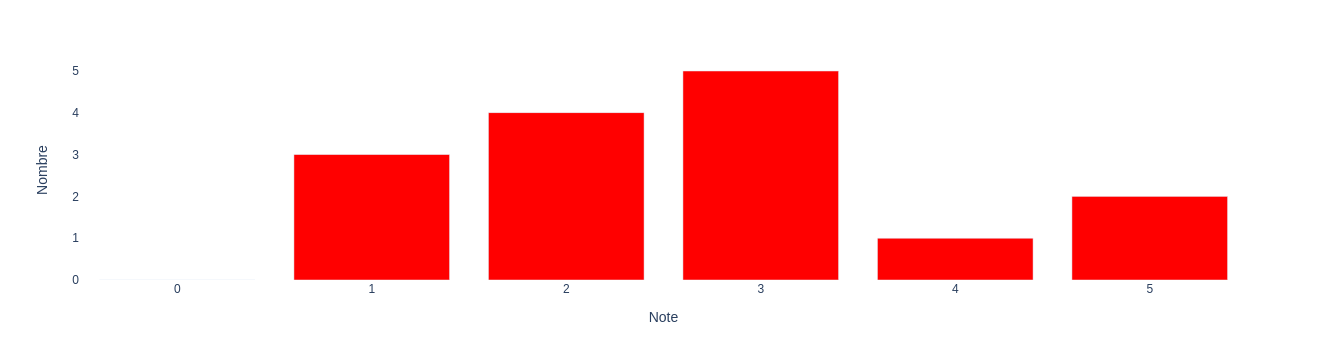

In [94]:
import plotly.graph_objects as go

import pandas as pd


abondanceNote={0:0,1:3,2:4,3:5,4:1,5:2}


dfp = {
    'Note' : list(abondanceNote.keys()),
    'Nombre' : list(abondanceNote.values()),
}
# creating a Dataframe object 
df = pd.DataFrame(dfp)





import plotly.express as px
fig = px.bar(df,x='Note',y='Nombre')
fig.update_layout(bargap=0.2,
plot_bgcolor="rgba(0, 0, 0, 0)" ,
paper_bgcolor="rgba(0, 0, 0, 0)",
)
fig.update_traces(marker_color='red')

fig.show()

